In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import silhouette_score
import pandas as pd
import numpy as np
from soyclustering import SphericalKMeans #이게 sphericalkmeans. pip install soyclustering 하면 됨
import nltk
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import RegexpTokenizer
from scipy.io import mmread

C:\Users\건우\AppData\Roaming\Python\Python37\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [106]:
data = pd.read_csv('C:\\Users\\건우\\desktop\\cluster_1_sd.csv', index_col = 0) #카페 크롤링한 데이터 불러오기
data.reset_index(drop=True, inplace=True)
data

#tit제목 body본문 comment댓글 source데이터출처 keyword키워드기반수집 doc=preprocessing(tit+body+comment) okt형태소분석

,tit,body,comment,source,keyword,doc,target,okt,k8
0,형제님들 LVC 뉴린스 세탁 어떻게들 하고 계십니까?,제목이 곧 내용입니다.사실 LVC47501 뉴린스 제품을 14년 초에 구입하면서 ...,"[['부담가지실 필요없이 그냥 세탁기에 돌리시면 됩니다!'], ['ㅎㅎ남자답게 한번...",E,세탁,형제님들 뉴린스 세탁 어떻게 들하고 계십니까 제목이 곧 내용입니다 사실 뉴린스 제품...,1.0,"['형제', '들다', '뉴', '린스', '세탁', '어떻다', '들다', '계시...",1
1,레졸루트 워싱 질문드립니다.,작년 여름 즈음에 레졸루트를 구매하였는데요청바지를 자주 세탁하다보니 색상이 많이 빠...,[['인디고 염색특성 상 세탁을 지속적으로 한다면 페이딩이 빨리 생깁니다. 다만 전...,E,세탁,레졸 루트 워싱 질문 드립니다 작년 여름 즈음에 레졸 루트를 구매하였는데 요청 바지...,1.0,"['레졸', '루트', '워싱', '질문', '드리다', '작년', '여름', '즈...",1
2,유스(콘밀) 수축률?,콘밀도 기존 청바지와 수축률을 비슷하겠죠?지금 사이즈가 딱좋은데 세탁하면 줄을까봐 ...,[],E,세탁,유스콘 밀수축률 콘밀도 기존 청바지와 수축률을 비슷하겠죠 지금 사이즈가 딱 좋은데 ...,1.0,"['유', '스콘', '밀수', '축률', '콘밀', '기존', '청바지', '수축...",1
3,깃먼빈티지 옥스포드 셔츠 세탁시 수축있나여?,깃먼빈티지 옥스포드 딱 좋은 사이즈로입고있는데왠지 세탁해서 수축하면 어깨가작을거같은...,[['모든 옷은 0.~cm라도 수축은 발생한다고 생각하는게 편하실거같아요.이번에 저...,E,세탁,깃먼 빈티지옥스포드 셔츠 세탁 시 수축 있여깃먼 빈티지옥스포드 딱 좋은 사이즈로 입...,1.0,"['깃', '멀다', '빈티', '옥스포드', '셔츠', '세탁', '시', '수축...",1
4,데님은 세탁할수록 수축되는건가요?,"안녕하세요..데님에 관심을 가지게 되면서 궁금한게 너무나도 많습니다! 몇 달 전, ...",[['저도궁금하내요~! 세탁만해도 수축이되는지 아님 고온건조시켜야 수축이되는지요~!...,E,세탁,데님은 세탁할수록 수축되는 건가요 데님에 관심을 가지게 되면서 궁금한 게 너무도 많...,1.0,"['데님', '세탁', '수축', '되다', '건가', '데님', '관심', '가지...",1
...,...,...,...,...,...,...,...,...,...
2424,유니클로 드라이스트레치 시어서커 자켓 네이비색 셋업처럼 입을만한 바지 없을까요..?,제목이 내용입니다.. 혹시 자켓 소지하신분들 코디 어떻게 하시는지도 궁금합니다,[],A,드라이,유니클로 드라이스트레치 시어서커 자켓 네이비색 셋업처럼 입을만한 바지 없을까요 제목...,1.0,"['유니클로', '드라이', '스트레', '치', '시어서커', '자켓', '네이비...",1
2425,유니클로 드라이라이트웨이트 자켓 있으신분?,소재랑 색상이 좋아서 사긴했는데 다시 입어보니 소매가 좀 기네요?윗 사진이 그냥입기...,"[['감탄보단 길더라구요. 한단접어입다가 불편하다싶으면 수선하세요'], ['이너부터...",E,드라이,유니클로 드라이라이트웨이트 자켓 있으신분 소재랑 색상이 좋아서 사긴했는데 다시 입어...,1.0,"['유니클로', '드라이', '라이트', '웨이', '트', '자켓', '있다', ...",1
2426,나나미카 클럽자켓 문의드립니다.,나나미카 이자켓 입어보신분 계신가요? 알파드라이 자켓은 많이 본거 같은데 이건 평이...,[],E,드라이,나나미카 클럽자켓 문의드립니다 나나미카 이자켓 입어보신분 계신가요 알파드라이 자켓은...,1.0,"['나나', '미카', '클럽', '자켓', '문의', '드리다', '나나', '미...",1
2427,코스에서 산 가디건 평가 부탁드려요,● 모든 게시물은 사진 + 글 첨부 필수 & 질문 게시글 삭제시 활동정지​,[['수축이 부담되시면 L무난한 제품군이 많으시면 소장하셔도 될 것 같아요유행은 안...,E,드라이,코스에서 산 가디건 평가 부탁드려요 수축이 부담되시면 무난한 제품군이 많...,1.0,"['코스', '산', '가디건', '평가', '부탁드리다', '수축', '부담', ...",1


In [107]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer() #bag of words 방식으로 할 것임 countervectorizer 사용
vect.fit(data.okt) #okt로 미리 분리해놓은 거 사용
vect.vocabulary_

{'형제': 9764,
 '들다': 2249,
 '린스': 2707,
 '세탁': 4603,
 '어떻다': 5620,
 '계시다': 537,
 '제목': 7557,
 '내용': 1280,
 '이다': 6849,
 '사실': 4250,
 '제품': 7584,
 '구입': 770,
 '지금': 7855,
 '바지': 3405,
 '혹사': 9782,
 '시키다': 5089,
 '생각': 4421,
 '시작': 5071,
 '입다': 7089,
 '만큼': 2840,
 '관리': 676,
 '해주다': 9607,
 '매우': 2927,
 '심각하다': 5190,
 '냄새': 1288,
 '가다': 18,
 '아니다': 5301,
 '슬슬': 5005,
 '돌리다': 2044,
 '싶다': 5216,
 '궁금하다': 818,
 '올리다': 6139,
 '그렇다': 865,
 '친절하다': 8524,
 '답변': 1752,
 '기다리다': 957,
 '부담': 3825,
 '필요': 9370,
 '그냥': 846,
 '세탁기': 4604,
 '돌리시': 2046,
 '되다': 2089,
 '남다': 1234,
 '한번': 9525,
 '보다': 3714,
 '오히려': 6119,
 '자연스럽다': 7167,
 '워싱': 6498,
 '생기': 4425,
 '잇다': 7119,
 '같다': 209,
 '돌려주다': 2038,
 '걱정': 384,
 '문제': 3216,
 '사다': 4221,
 '있다': 7122,
 '쏘다': 5239,
 '대한': 1851,
 '덜하다': 1892,
 '겠다': 484,
 '감사하다': 163,
 '전달': 7388,
 '모든': 3070,
 '텔라슨': 8883,
 '뒤지다': 2154,
 '제로': 7554,
 '찬물': 8228,
 '고고': 548,
 '울다': 6466,
 '조금': 7604,
 '풀다': 9267,
 '마초': 2789,
 '스타일': 4908,
 '레졸': 2534,
 '루트': 2621,
 '질문': 80

In [152]:
#okt로 구분 안 하고 쓰면 토큰화가 좋지 못하기 때문
#vect2 = CountVectorizer()
#vect2.fit(data.doc) 
#vect2.vocabulary_

{'형제님들': 50278,
 '뉴린스': 7865,
 '세탁': 23610,
 '어떻게': 29690,
 '들하고': 12468,
 '계십니까': 3097,
 '제목이': 40526,
 '내용입니다': 6920,
 '사실': 21488,
 '제품을': 40675,
 '초에': 44736,
 '구입하면서': 4349,
 '지금까지': 42625,
 '바지를': 17504,
 '너무': 7033,
 '많이': 14395,
 '혹사시켰다는': 50313,
 '생각이': 22756,
 '들기': 12316,
 '시작했습니다': 26610,
 '입은': 37551,
 '만큼': 14307,
 '관리를': 3658,
 '해줘야': 49643,
 '하는데': 48358,
 '아직까지': 28153,
 '세탁한': 24149,
 '해줬네요': 49644,
 '그렇다고': 5046,
 '매우': 15340,
 '심각한': 27059,
 '냄새가는': 6945,
 '아닌데': 27811,
 '슬슬': 26404,
 '세탁을': 23895,
 '돌려야': 10563,
 '하는': 48345,
 '아닌가': 27786,
 '싶기도': 27229,
 '하고': 48200,
 '형제님들은': 50282,
 '관리하시고': 3676,
 '계신': 3067,
 '궁금하여': 4576,
 '글을': 5287,
 '올립니다': 32409,
 '그럼': 4994,
 '친절한': 45298,
 '답변기다리겠습니다': 9537,
 '부담': 19411,
 '가지실': 569,
 '필요': 47978,
 '없이': 30573,
 '그냥': 4705,
 '세탁기에': 23684,
 '돌리시면': 10696,
 '됩니다': 11474,
 '남자답게': 6725,
 '한번': 49031,
 '돌려보겠습니다': 10528,
 '오히려': 32173,
 '돌려서': 10561,
 '자연스러운': 38401,
 '워싱도': 34695,
 '생기면': 22932,
 '멋잇을': 15575,
 '같은데요': 1

In [114]:
#앞번호 부터 정렬
res = sorted(vect.vocabulary_.items())
res

[('가가', 0),
 ('가게', 1),
 ('가격', 2),
 ('가공', 3),
 ('가기', 4),
 ('가까워지다', 5),
 ('가까이', 6),
 ('가깝다', 7),
 ('가끔', 8),
 ('가나', 9),
 ('가난하다', 10),
 ('가년', 11),
 ('가누다', 12),
 ('가늘다', 13),
 ('가늠', 14),
 ('가능', 15),
 ('가능성', 16),
 ('가능하다', 17),
 ('가다', 18),
 ('가다가', 19),
 ('가닥', 20),
 ('가도', 21),
 ('가두', 22),
 ('가두다', 23),
 ('가드', 24),
 ('가득하다', 25),
 ('가든', 26),
 ('가디', 27),
 ('가디건', 28),
 ('가뜩', 29),
 ('가뜩이나', 30),
 ('가라', 31),
 ('가라데', 32),
 ('가라지', 33),
 ('가랑이', 34),
 ('가랭', 35),
 ('가랭이', 36),
 ('가량', 37),
 ('가렴', 38),
 ('가령', 39),
 ('가로', 40),
 ('가로수', 41),
 ('가로수길', 42),
 ('가루', 43),
 ('가르다', 44),
 ('가르치다', 45),
 ('가르침', 46),
 ('가리다', 47),
 ('가막', 48),
 ('가먼츠', 49),
 ('가면', 50),
 ('가물', 51),
 ('가바', 52),
 ('가방', 53),
 ('가버네', 54),
 ('가볍다', 55),
 ('가보', 56),
 ('가보다', 57),
 ('가부', 58),
 ('가붕떠버려', 59),
 ('가비', 60),
 ('가사', 61),
 ('가성', 62),
 ('가세', 63),
 ('가세영', 64),
 ('가셕', 65),
 ('가셧', 66),
 ('가수', 67),
 ('가스', 68),
 ('가슴', 69),
 ('가시', 70),
 ('가시다', 71),
 ('가신', 72),
 ('가안', 73),
 ('가야', 

In [108]:
#벡터화
X = vect.fit_transform(data.okt)
print(vect.get_feature_names()) 
print(X.toarray())

['가가', '가게', '가격', '가공', '가기', '가까워지다', '가까이', '가깝다', '가끔', '가나', '가난하다', '가년', '가누다', '가늘다', '가늠', '가능', '가능성', '가능하다', '가다', '가다가', '가닥', '가도', '가두', '가두다', '가드', '가득하다', '가든', '가디', '가디건', '가뜩', '가뜩이나', '가라', '가라데', '가라지', '가랑이', '가랭', '가랭이', '가량', '가렴', '가령', '가로', '가로수', '가로수길', '가루', '가르다', '가르치다', '가르침', '가리다', '가막', '가먼츠', '가면', '가물', '가바', '가방', '가버네', '가볍다', '가보', '가보다', '가부', '가붕떠버려', '가비', '가사', '가성', '가세', '가세영', '가셕', '가셧', '가수', '가스', '가슴', '가시', '가시다', '가신', '가안', '가야', '가야대', '가약', '가염', '가오', '가오리', '가요', '가요불랙진', '가요제', '가요핏', '가욤스펙', '가용', '가운', '가운데', '가위', '가유', '가을', '가이드', '가이드라인', '가인', '가입', '가장', '가장이', '가전', '가정', '가져가다', '가져스트핏', '가져오다', '가져왓네요앶', '가족', '가죠넵', '가죽', '가죽탭', '가지', '가지각색', '가지다', '가짜', '가치', '가치관', '가카', '가편', '가평', '가품', '가하다', '각각', '각도', '각시', '각양각색', '각의', '각인', '각자', '각종', '간간이', '간격', '간다', '간단하다', '간만', '간색', '간의', '간지', '간지나다', '간직', '간질', '간체', '갈가욤넹전', '갈껍', '갈다', '갈등', '갈라고', '갈라지다', '갈라티', '갈랍', '갈리', '갈리다', '갈비탕', '갈수록', '갈아입다', '

In [109]:
X #sparse matrix 형태로 만들어짐 2429*9981

<2429x9981 sparse matrix of type '<class 'numpy.int64'>'
	with 115521 stored elements in Compressed Sparse Row format>

In [110]:
len(data), len(vect.vocabulary_) # 벡터 크기 확인 2429는 data수, 9981은 okt로 나눠졌던 단어수

(2429, 9981)

In [111]:
print(X) #soyclustering module이 원하는 sparse matrix 형태로 만들어진 것을 확인 가능

  (0, 9764)	2
  (0, 2249)	4
  (0, 2707)	3
  (0, 4603)	3
  (0, 5620)	2
  (0, 537)	2
  (0, 7557)	1
  (0, 1280)	1
  (0, 6849)	1
  (0, 4250)	1
  (0, 7584)	1
  (0, 770)	1
  (0, 7855)	1
  (0, 3405)	1
  (0, 9782)	1
  (0, 5089)	1
  (0, 4421)	1
  (0, 5071)	1
  (0, 7089)	1
  (0, 2840)	1
  (0, 676)	2
  (0, 9607)	2
  (0, 2927)	1
  (0, 5190)	1
  (0, 1288)	1
  :	:
  (2428, 4958)	1
  (2428, 7493)	1
  (2428, 2180)	1
  (2428, 5484)	1
  (2428, 9445)	1
  (2428, 63)	1
  (2428, 9746)	1
  (2428, 3184)	1
  (2428, 5556)	1
  (2428, 2987)	1
  (2428, 6678)	2
  (2428, 9301)	1
  (2428, 4382)	2
  (2428, 140)	2
  (2428, 2903)	1
  (2428, 932)	1
  (2428, 5719)	1
  (2428, 1311)	1
  (2428, 5816)	1
  (2428, 8219)	1
  (2428, 4877)	1
  (2428, 3057)	1
  (2428, 4873)	1
  (2428, 1033)	1
  (2428, 4082)	1


In [112]:
from scipy.sparse import csr_matrix

#csr =  csr_matrix(X)  #csr_matrix함수를 써서 sparse matrix를 만들 수 있음

spherical_kmeans = SphericalKMeans(
    n_clusters=500,#클러스터 개수 지정 : 1000으로 크게 하라고 서술돼있음
    max_iter=10, #반복수 지정 : 10번 이어도 충분하다고 서술돼있음
    verbose=1, #initialization 과 매 iteration 에서의 계산 시간과 centroid vectors 의 sparsity 가 출력
    init='similar_cut',
    sparsity='minimum_df',
    minimum_df_factor=0.05
)

labels = spherical_kmeans.fit_predict(X)

initialization_time=0.150590 sec, sparsity=0.00447
n_iter=1, changed=2416, inertia=950.461, iter_time=0.556 sec, sparsity=0.00232
n_iter=2, changed=416, inertia=828.456, iter_time=0.566 sec, sparsity=0.00236
n_iter=3, changed=156, inertia=812.967, iter_time=0.540 sec, sparsity=0.00238
n_iter=4, changed=78, inertia=808.309, iter_time=0.557 sec, sparsity=0.00238
n_iter=5, changed=37, inertia=805.450, iter_time=0.564 sec, sparsity=0.00241
n_iter=6, changed=19, inertia=804.789, iter_time=0.596 sec, sparsity=0.00241
n_iter=7, changed=9, inertia=804.368, iter_time=0.592 sec, sparsity=0.00241
n_iter=8, changed=8, inertia=804.143, iter_time=0.588 sec, sparsity=0.00241
n_iter=9, changed=5, inertia=804.085, iter_time=0.579 sec, sparsity=0.00241
n_iter=10, changed=1, inertia=803.976, iter_time=0.543 sec, sparsity=0.00241


In [113]:
centers = spherical_kmeans.cluster_centers_ #클러스터 개수 지정한 만큼 center수 동일
len(centers)

500

In [115]:
from soyclustering import proportion_keywords #클러스터별 키워드 추출

vocabs = [vocab for vocab, idx in sorted(vect.vocabulary_.items(), key=lambda x:x[1])] 
centers = spherical_kmeans.cluster_centers_
labels = spherical_kmeans.labels_

keywords = proportion_keywords( #keyword extraction 방법에 기반하여 각 군집의 키워드를 추출
    centers, 
    labels,
    index2word=vocabs)

In [122]:
keywords

[[('티셔츠', 0.9648146685044161),
  ('가다', 0.901745109153621),
  ('혹시', 0.8942736176018528),
  ('심하다', 0.8821232773133242),
  ('구매', 0.8252660418580565),
  ('자다', 0.7976835226257973),
  ('어떻다', 0.7682106198181297),
  ('있다', 0.7636610256832054),
  ('수축', 0.7621436197149185),
  ('그렇다', 0.7405396541428979),
  ('드라이', 0.7240111810089769),
  ('사이즈', 0.6232614919298687),
  ('정도', 0.6111565395826541),
  ('없다', 0.6100132201759317),
  ('되다', 0.609638047421629),
  ('같다', 0.5929568969022705),
  ('보다', 0.5692135939106004),
  ('기장', 0.5123594986630126)],
 [('드레', 1.0),
  ('익스', 1.0),
  ('자켓', 0.9958389895971486),
  ('비지', 0.9924901175430004)],
 [('조거', 0.9999660874536116),
  ('하라', 0.9998916699558691),
  ('몇번', 0.9998837783586833),
  ('친구', 0.9998311044633691),
  ('짧아지다', 0.9998133716304053),
  ('동안', 0.9951619932237532),
  ('팬츠', 0.9946687792376936),
  ('드라이클리닝', 0.9886048831920657),
  ('주다', 0.9512671038731879),
  ('빨다', 0.9501665806944062),
  ('세탁기', 0.8947639061710236),
  ('그렇다', 0.869722220688424

In [135]:
len(keywords) #k개수만큼 나옴

500

In [136]:
keywords[400] #400번째 클러스터의 키워드 추출

[('오션', 1.0),
 ('단종', 1.0),
 ('도와주다', 1.0),
 ('멀엇어', 1.0),
 ('슬슬', 1.0),
 ('씬핀드스', 1.0),
 ('진품', 1.0),
 ('다크', 0.9998134648631725),
 ('상품', 0.9994631611713916),
 ('디퀘', 0.9994494149580149),
 ('입문', 0.9993843730061416),
 ('끌리다', 0.9993796584153962),
 ('구장', 0.9992855881462384),
 ('구분', 0.9992586397754909),
 ('다행', 0.9991594035610987),
 ('잘못', 0.9989951308091216),
 ('요드', 0.997909252163192),
 ('여쭈다', 0.9960936093787148),
 ('지르다', 0.9954532394780575),
 ('매니아', 0.9953532116323116),
 ('매물', 0.9951664761196057),
 ('짜다', 0.9903888988574123),
 ('동안', 0.9863437217255272),
 ('이번', 0.9852034868914381),
 ('처음', 0.9731646245273002),
 ('개월', 0.9727097025005048),
 ('누디', 0.9671362734343986),
 ('해보다', 0.8517721683342994),
 ('자다', 0.7691620254967366),
 ('구매', 0.768134033159012),
 ('청바지', 0.7358709068610736),
 ('보다', 0.5856097637712508),
 ('없다', 0.506886228674008)]

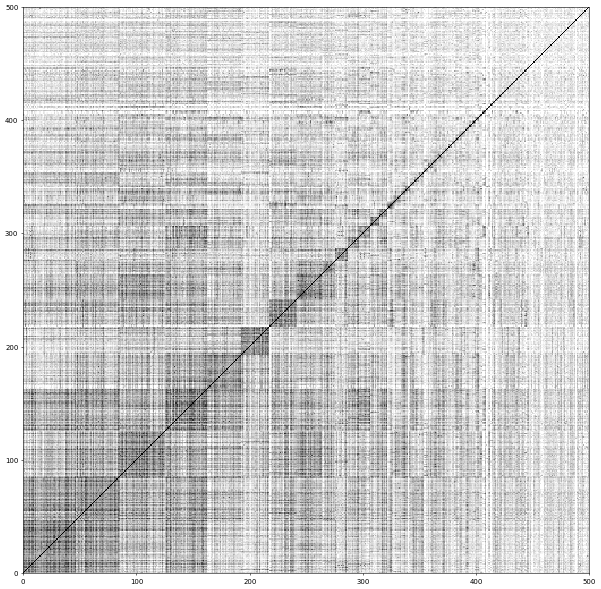

In [117]:
from soyclustering import visualize_pairwise_distance

#k 개수를 크게 설정했기 때문에 불필요한(redundant), 중복되는, 비슷한 클러스터 많이 생김
#pairwise distance 보고 불필요한 클러스터 식별하기
#diagonal elements 만 진한 색이 띈다면 각각의 군집이 서로 상이하다는 의미

# visualize pairwise distance matrix
fig = visualize_pairwise_distance(centers, max_dist=.7, sort=True)

In [118]:
len(centers)

500

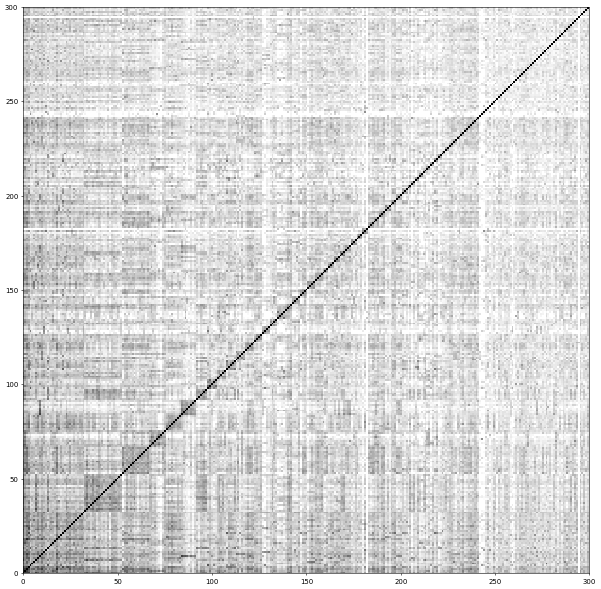

In [119]:
from soyclustering import merge_close_clusters

#불필요한 클러스터들 합쳐버리기
#Cosine distance 가 최대 max_dist 를 넘지 않는 군집들을 하나의 그룹으로 묶음

group_centers, groups = merge_close_clusters(centers, labels, max_dist=.5) #max_dist를 높게 할 수록 많이 묶임
fig = visualize_pairwise_distance(group_centers, max_dist=.7, sort=True)

In [120]:
len(group_centers) #grouping 후 center개수 : 500에서 300개로 줄음

300

In [121]:
for group in groups: #누가누가 같이 묶였나 확인
    print(group)

[60, 426, 7, 47, 59, 403, 431, 123, 419, 421, 332, 450, 89, 249, 70, 349, 0, 116, 311, 144, 265, 346, 223, 303, 456, 467, 477, 23, 99, 172, 261, 333, 76, 216, 413, 365, 245, 420]
[465, 38, 485, 476, 65, 101, 79, 118, 196, 373, 464, 385, 411, 407, 451, 383, 397, 366, 391, 92, 272, 129, 198, 156, 352, 437]
[497, 354, 138, 259, 330, 228, 86, 266, 486, 229, 121, 182, 148, 142, 264, 187, 149, 433]
[277, 342, 43, 247, 282, 427, 369, 218, 255, 460, 248, 267, 455, 301, 292, 36, 170, 25]
[470, 446, 180, 58, 104]
[68, 205, 250, 186]
[199, 336, 51, 315, 335]
[359, 235, 105, 40, 128, 409]
[127, 88, 370, 404, 57, 237, 22, 107, 299]
[164, 408, 283, 75, 62, 338, 112, 122, 481, 110]
[200, 190, 480, 302, 488, 257, 416]
[258, 31, 270, 362, 42]
[28, 53]
[83, 18, 46, 95, 179]
[280]
[306, 219]
[6, 155]
[26]
[98, 309]
[372, 318, 20, 72, 355, 439, 44]
[384, 147, 33]
[440]
[109, 185]
[328, 490, 234, 253]
[435]
[54, 241, 97, 113]
[106, 41, 45]
[125]
[126, 220]
[212, 394]
[269]
[343]
[351, 482, 293, 331, 204, 4

In [151]:
groups[4]

[470, 446, 180, 58, 104]

In [137]:
# 470, 446, 180, 58, 104 확인
print(keywords[470],
      keywords[446],
      keywords[180],
      keywords[58],
      keywords[104],
     )

[('물다', 0.9931379807323177), ('세탁소', 0.9870742034337677), ('탁하다', 0.9828567765919012), ('맡다', 0.9782218038259003), ('원래', 0.9752887643874805), ('플랙진', 0.9741543342442628), ('맡기다', 0.9696367258941146), ('무릎', 0.9582959487290922), ('드라이', 0.95220941438885), ('주다', 0.9067069539730898), ('가요', 0.8931735108846303), ('심하다', 0.8783425420047616), ('줄다', 0.8301580735740094), ('가다', 0.7813787506153402), ('그렇다', 0.7326355083708106), ('청바지', 0.7238844978896048), ('기장', 0.6994531766353925), ('줄어들다', 0.6822849228033514), ('좋다', 0.6755650475451751), ('같다', 0.6011418304017736), ('보다', 0.5689244336898556), ('감사하다', 0.5584294854160073)] [('나서다', 0.9987641269735692), ('드블코', 0.9818902974147846), ('맡기다', 0.9610825207297492), ('냄새', 0.9586663735423699), ('드라이', 0.9391560220266157), ('빨래', 0.9332742129540258), ('빠지다', 0.8262461203843103), ('청바지', 0.7994804957208279), ('입다', 0.7984749943027649), ('돌리다', 0.7857796917050429), ('아니다', 0.7579631395458235), ('되다', 0.5334222227240554)] [('다운', 0.9920151377369633),

In [138]:
keywords[470]

[('물다', 0.9931379807323177),
 ('세탁소', 0.9870742034337677),
 ('탁하다', 0.9828567765919012),
 ('맡다', 0.9782218038259003),
 ('원래', 0.9752887643874805),
 ('플랙진', 0.9741543342442628),
 ('맡기다', 0.9696367258941146),
 ('무릎', 0.9582959487290922),
 ('드라이', 0.95220941438885),
 ('주다', 0.9067069539730898),
 ('가요', 0.8931735108846303),
 ('심하다', 0.8783425420047616),
 ('줄다', 0.8301580735740094),
 ('가다', 0.7813787506153402),
 ('그렇다', 0.7326355083708106),
 ('청바지', 0.7238844978896048),
 ('기장', 0.6994531766353925),
 ('줄어들다', 0.6822849228033514),
 ('좋다', 0.6755650475451751),
 ('같다', 0.6011418304017736),
 ('보다', 0.5689244336898556),
 ('감사하다', 0.5584294854160073)]

In [139]:
keywords[446]

[('나서다', 0.9987641269735692),
 ('드블코', 0.9818902974147846),
 ('맡기다', 0.9610825207297492),
 ('냄새', 0.9586663735423699),
 ('드라이', 0.9391560220266157),
 ('빨래', 0.9332742129540258),
 ('빠지다', 0.8262461203843103),
 ('청바지', 0.7994804957208279),
 ('입다', 0.7984749943027649),
 ('돌리다', 0.7857796917050429),
 ('아니다', 0.7579631395458235),
 ('되다', 0.5334222227240554)]

In [140]:
keywords[180]

[('다운', 0.9920151377369633),
 ('물다', 0.9914062320771451),
 ('그대로', 0.989855897066215),
 ('맡기다', 0.9863876146525843),
 ('탁하다', 0.9831192703781765),
 ('아크네', 0.9650689829087372),
 ('드라이', 0.9399071537031336),
 ('주다', 0.9398013675000694),
 ('니트', 0.9298436993408067),
 ('사이즈', 0.8498641933050587),
 ('맞다', 0.7850786319813547),
 ('수축', 0.5851792978600298)]

In [141]:
 keywords[58]

[('갈라티', 1.0),
 ('제발', 0.9998164282563838),
 ('펴다', 0.9954562733290122),
 ('말리다', 0.9887005133860214),
 ('그대로', 0.988484965883148),
 ('약간', 0.9861498748928057),
 ('자주', 0.9683829975546057),
 ('빨래', 0.9676034544631166),
 ('괜찮다', 0.9121555455611355),
 ('싶다', 0.9085237950246146),
 ('드라이', 0.8878213627889923),
 ('줄어들다', 0.8816656392029022),
 ('사이즈', 0.7878031639572446),
 ('맞다', 0.7731042893536403),
 ('입다', 0.5894315835857836)]

In [142]:
keywords[104]

[('기모', 0.9971337940446156),
 ('맡기다', 0.9857347307176052),
 ('빠지다', 0.9470986960165976),
 ('드라이', 0.9087661453957052),
 ('줄어들다', 0.9054477894830784),
 ('않다', 0.8703950106323342),
 ('늘어나다', 0.8695388966728586),
 ('사이즈', 0.6048285312640518),
 ('되다', 0.6045267218018331)]

# 참고 

https://github.com/lovit/clustering4docs -> github 코드

https://lovit.github.io/nlp/machine%20learning/2018/10/16/spherical_kmeans/ -> 저자 블로그
